# Herleitung

![](Biegelinie1.png)

Imports

In [1]:
from sympy import *
from sympy import init_printing
init_printing() 

Differentialgleichung definieren

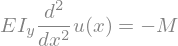

In [2]:
E,Iy,x,L,F, M =symbols('E I_y x L F M')
u=symbols('u',cls=Function)
dglg=Eq(E*Iy*u(x).diff(x,2),-M)
dglg

Momentenverlauf

![](Biegelinie2.png)

In [3]:
M=F*L+F*x

Falls nicht klar ist wie man auf die Gleichung kommt, hier eine mögliche Herleitung:

In [4]:
# y(x=0) = FL
x1=0
y1=F*L 

# y(x=L) = 0
x2=L
y2=0

M = (y2-y1)/(x2-x1) * (x-x1) + y1

Die komplette Differentialgleichung lautet dann wie folgt:

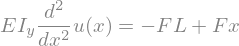

In [5]:
dglg=Eq(E*Iy*u(x).diff(x,2),-M)
dglg

Differentialgleichung lösen

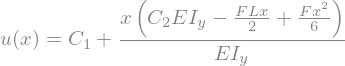

In [6]:
u=dsolve(dglg,u(x))
u

Integrationskonstanten mit Hilfe von Randbedingungen bestimmen

- u(x=0) = 0 -> muss umgestellt werden das Gleichung == 0 (ist bereits erfolgt)
- u'(x=0) = 0 -> muss umgestellt werden das Gleichung == 0 (ist bereits erfolgt)

<div class="alert alert-block alert-info">
<b>Hinweis zum Umstellung der Gleichung ==0:</b> Wäre die Randbedingung u(x=L)=1 so müsste stehen: u.rhs.subs(x,L)-1
</div>


In [7]:
bed1 = u.rhs.subs(x,0)
bed2 = u.rhs.diff(x).subs(x,0)
C = solve([bed1,bed2])
C

Integrationskonstanten einsetzen

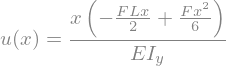

In [8]:
u = u.subs(C)
u

Gleichung vereinfachen

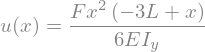

In [9]:
u.simplify()

Daten einsetzen

Will man die das Ergebnis grafisch darstellen, so muss man Werte einsetzen

Beispieldaten: 
- $F=5N$
- $L=10mm$
- $E=210000MPa$
- $I_y=1mm^4$

Das Ergebnis ist dann in den Einheiten in denen die Beispieldaten gegeben sind (also hier in mm)

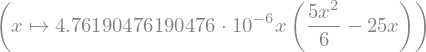

In [10]:
data=[(F,5),(L,10),(E,210e3),(Iy,1)]
ux = Lambda(x, u.rhs.subs(data))
ux

plotten

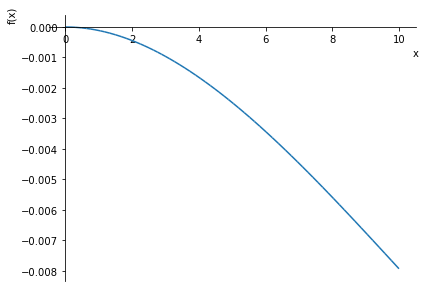

In [11]:
plot(ux(x),(x,0,L.subs(data)));